In this assignment, we will be using the K-nearest neighbors  algorithm to predict how many points NBA players scored in the 2013-2014  season. 

Before we dive into the algorithm, let’s take a look at our data. Each row in  the data contains information on how a player performed in the 2013-2014  NBA season. 

Here are the columns from the data: 

1. player - name of the player 
2. pos - the position of the player 
3. age - age of the player
4. bref_team_id - team id of the player
5. g - number of games the player was in 
6. gs - number of games the player started 
7. pts - total points the player scored
8. mp - minutes played
9. fg - field goals (includes both 2-point field goals and 3-point field goals)
10. fga - field goal attempts (includes both 2-point field goal attempts and 3-point field goal attempts)
11. fg. - field goal percentage; the formula is fg / fga.
12. x3p - 3 point shots made (shots made from beyond 3 point arc)
13. x3pa - 3 point shots attempted (shots taken from beyond 3 point arc)
14. x3p. - 3 point shot percentage; the formula is x3p / x3pa
15. x2p - 2 point shots made
16. x2pa - 2 point shots attempted
17. x2p. - 2 point shot percentage; the formula is x2p / x2pa
18. efg. - effective field goal percentage; the formula is (fg + 0.5 * x3p) / fga
19. ft - free throws
20. fta - free throw attempts
21. ft. - free throw percentage; the formula is ft / fta
22. orb - offensive rebounds
23. drb - defensive rebounds
24. trb - total rebounds
25. ast - assists
26. stl - steals
27. blk - blocks
28. tov - turnovers
29. pf - personal fouls
30. pts - points
31. season - season
32. season_end - year when season ended

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# loading dataset
with open("C://Users//Admin//Desktop//iNeuron//Assignments//Dataset//nba_2013.csv", 'r') as csvfile: 
    nba = pd.read_csv(csvfile) 

In [3]:
# display all columns
pd.set_option('display.max_columns', None)

# first 5 rows of the dataset
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
# dimensions of the dataset
nba.shape

(481, 31)

In [5]:
# dataset description
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [6]:
# dataset info
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

We see some missing values. Let's dig deeper.

In [7]:
nba.isnull().sum().sort_values(ascending=False)

x3p.            67
ft.             20
x2p.             3
fg.              2
efg.             2
tov              0
blk              0
stl              0
ft               0
pf               0
trb              0
drb              0
pts              0
orb              0
season           0
fta              0
ast              0
player           0
pos              0
x2pa             0
x2p              0
x3pa             0
x3p              0
fga              0
fg               0
mp               0
gs               0
g                0
bref_team_id     0
age              0
season_end       0
dtype: int64

Let's check the 'ft.' also known as the free throws percentage column.

In [8]:
# finding the NaN values
nba.loc[(nba['ft']==0) & (nba['fta']==0), ["ft","fta","ft."]]

,ft,fta,ft.
27,0,0,NaN
90,0,0,NaN
102,0,0,NaN
109,0,0,NaN
112,0,0,NaN
134,0,0,NaN
137,0,0,NaN
166,0,0,NaN
190,0,0,NaN
219,0,0,NaN


The 'ft.' column has null values where the corresponding 'ft' and 'fta' columns are zero. The formula for 'ft.' is ft / fta. We can replace the NaN values with zero to fix this.

In [9]:
# replacing NaN values based on certain conditions
nba.loc[(nba.ft == 0) & (nba.fta == 0),'ft.'] = 0

Likewise let's fix the remaining columns.

In [10]:
# replacing NaN values based on certain conditions
nba.loc[(nba.fg == 0) & (nba.fga == 0),'fg.'] = 0
nba.loc[(nba.x3p == 0) & (nba.x3pa == 0),'x3p.'] = 0
nba.loc[(nba.x2p == 0) & (nba.x2pa == 0),'x2p.'] = 0
nba.loc[(nba.fg == 0) & (nba.x3pa == 0) & (nba.fga ==0),'efg.'] = 0

Let's check if there are any more null values.

In [11]:
nba.isnull().sum().sort_values(ascending=False)

player          0
efg.            0
season          0
pts             0
pf              0
tov             0
blk             0
stl             0
ast             0
trb             0
drb             0
orb             0
ft.             0
fta             0
ft              0
x2p.            0
pos             0
x2pa            0
x2p             0
x3p.            0
x3pa            0
x3p             0
fg.             0
fga             0
fg              0
mp              0
gs              0
g               0
bref_team_id    0
age             0
season_end      0
dtype: int64

Great, the dataset is now complete. Let's proceed.

In [12]:
# dropping unecessary columns
nba.drop(["player", "bref_team_id", "season", "season_end"], axis=1, inplace=True) # player name, team id and the season year are dropped as they do not bring any value

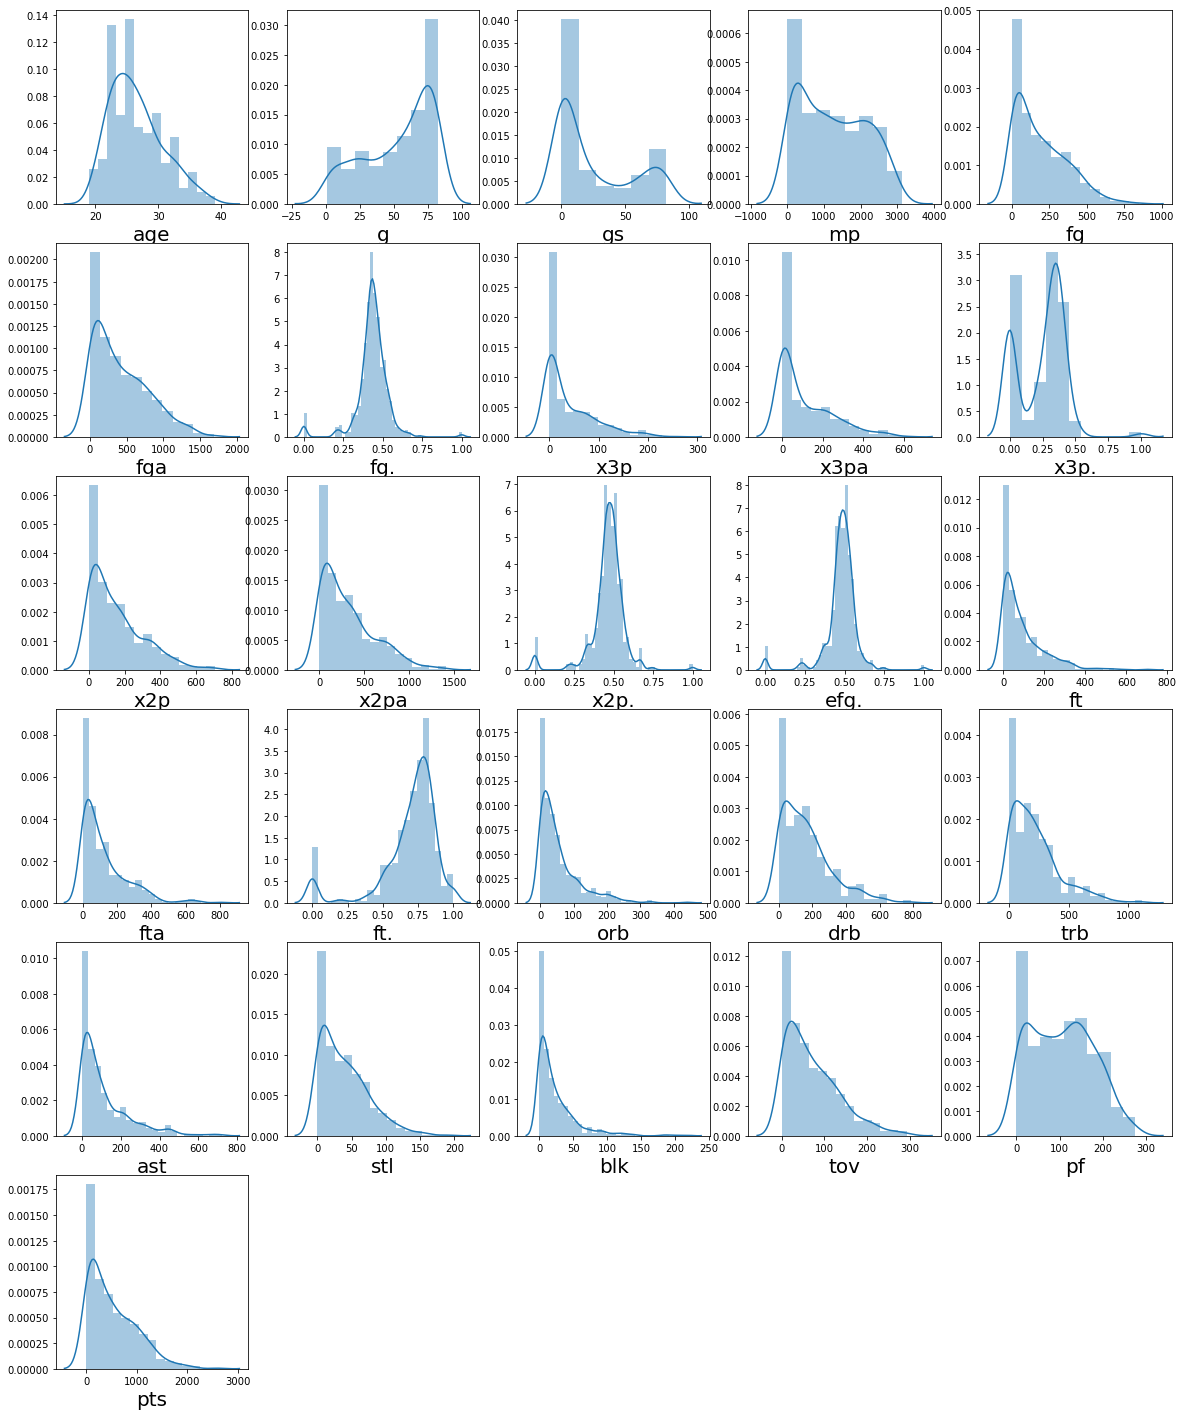

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

df = nba.drop(["pos"], axis=1)
for column in df:
    if plotnumber<=26 :
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
nba.pos.unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

There are 7 unique player positions. Let's perform one hot encoding.

In [15]:
# using pandas get_dummies to perform one hot encoding
nba = pd.concat([nba,pd.get_dummies(nba["pos"], drop_first=True)], axis=1)

# dropping the original column
nba.drop("pos", axis=1, inplace=True)

nba.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,F,G,PF,PG,SF,SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.000000,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.000000,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,0,0,0,0,0,0


We’ll go ahead and standardise this data as all the data is on a different scale.

In [16]:
# using standard scaler to standardise the dataset
scalar = StandardScaler()

X = nba.drop("pts", axis=1)
y = nba["pts"]

X_scaled = scalar.fit_transform(X)

Performing PCA to reduce our feature dimensions.

Text(0.5, 1.0, 'Explained Variance')

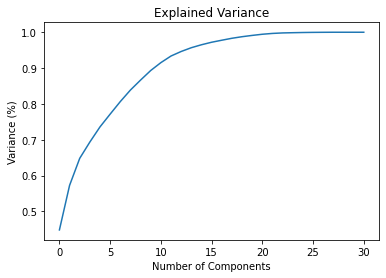

In [17]:
# using pca to reduce data dimensions
pca = PCA()
pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

From the diagram above, it can be seen that 10 principal components explain almost 90% of the variance in data and 15 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 15 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [18]:
pca = PCA(n_components=15)
new_data = pca.fit_transform(X_scaled)
df = pd.DataFrame(data = new_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.688621,1.081175,0.556028,-1.575534,-1.348217,-1.080435,0.307616,-0.055997,0.136616,0.492865,0.319979,-0.127562,0.702841,-0.467394,0.020523
1,0.199622,2.663301,-0.215299,-0.152192,-0.035959,-1.487933,0.746182,-0.075052,-0.203215,1.278192,-1.160526,-0.857920,0.294742,-0.720815,-0.480150
2,-0.560370,2.892543,-0.012949,0.651676,0.244875,0.529048,-0.668129,-0.299144,0.949426,-0.216658,-0.213286,-0.524612,0.079563,-0.064407,-0.158366
3,4.368208,-2.442452,0.656549,-0.239806,1.980005,0.650905,0.555200,0.307179,-0.065134,-1.157648,0.443826,0.241454,-0.559457,-0.098931,0.693905
4,-0.172672,2.441630,0.758199,0.296482,-0.023784,-0.782837,0.093689,0.278282,-0.655103,0.730699,-0.090303,-1.085917,-0.388765,0.071235,-0.085191


In [19]:
# splitting our dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(df, y, test_size = 0.30)

In [35]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9491003897663521

Let's try to increase the accuracy by using hyperparameter tuning.

In [37]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [2,3,4,5,6,7,8,9,10]
              }

In [38]:
gridsearch = GridSearchCV(knn, param_grid, verbose=3)

In [39]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.937, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.939, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.930, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.931, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.942, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.964, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.931, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.930, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.927, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.949, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.965, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.927, tota

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=6, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.954, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.957, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.932, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.929, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.940, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, score=0.951, total= 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=4, score=0.954, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=4 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=4, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=4 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=4, score=0.939, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=4 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=4, score=0.930, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=4 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=4, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.957, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.963, total= 

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.965, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.927, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.922, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.923, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=2, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=2, score=0.937, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=2, score=0.939, tot

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=7, score=0.940, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=8, score=0.951, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=8, score=0.960, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=8, score=0.931, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=8, score=0.928, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=8, score=0.933, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.949, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=4, score=0.930, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=4 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=4, score=0.938, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.957, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.963, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.933, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.937, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.948, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=10, score=0.923, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=2, score=0.938, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=2, score=0.937, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=2, score=0.939, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=2, score=0.930, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=2, score=0.931, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.942, total=   0.0s
[CV] a

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.940, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.951, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.960, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.931, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.928, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.933, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=9, score=0.949, total=   0.0s
[CV] al

[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.957, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.963, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.933, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.937, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.948, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=6, score=0.954, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=6, score=0.957, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.949, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.965, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.927, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.922, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.923, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=2, score=0.938, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=2, score=0.937, total=   0.0s
[CV] algorithm=b

[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.963, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.933, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.937, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.948, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=6, score=0.954, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=6, score=0.957, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=6, score=0.937, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, score=0.931, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, score=0.930, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, score=0.927, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.949, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.965, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.927, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.922, total=   0.0s
[CV] algorithm=br

[CV]  algorithm=brute, leaf_size=34, n_neighbors=4, score=0.930, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=4, score=0.938, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.957, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.963, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.933, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.937, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.948, total=   0.0s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 945 out of 945 | elapsed:    4.8s finished


GridSearchCV(estimator=KNeighborsRegressor(algorithm='ball_tree', leaf_size=18),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=3)

In [40]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [41]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size = 18, n_neighbors = 5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9491003897663521